# Statistik-Labor Testat Aufgabe 2
***Hinweise:***
- Bitte überprüfen Sie Ihre Resultate vor der Abgabe Ihre Ergebnisse mit den Teilergebnissen aus der Datei ***Teilergebnisse_xy.txt***.
- Die Unterlagen sind im **pdf-Format** in Moodle hochgeladen abzugeben. Richtige Lösungen werden nicht mehr an Sie zurückgegeben. Eine Abgabe per Email ist nicht möglich.
- Bitte füllen Sie das jeweilige **Deckblatt** mit aus und geben es mit Ihrer Lösung zusammen ab.

***Aufgabenstellung:***<br>
Untersuchen Sie die Bevölkerungsentwicklung der USA. <br>
In der Datei **sr_aufg_2_xy.txt** im Unterverzeichnis **Endziffer_xy** (*„xy“ steht für die beiden Endziffern Ihrer Matrikelnummer*) finden Sie die dafür erforderlichen Daten. <br>
Diese Datei enthält zwei Spalten fester Breite: Jahreszahl und Anzahl der Einwohner der USA in Millionen (zu einem festen Stichtag in dem angegebenen Jahr).

## a) Daten einlesen
Lesen Sie Daten in **Python** bzw. ein **Jupyter Notebook** ein. Speichern Sie sie in einem **Pandas DataFrame** ab.

In [168]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

dat = pd.read_csv('datasets/sr_aufg_2_13.txt', sep='\s+', decimal=',', header=None, names=['Jahr', 'Einwohner'])
#data.head(5)
dat

,Jahr,Einwohner
0,1790,3.929214
1,1800,5.308483
2,1810,7.239881
3,1820,9.638453
4,1830,12.866020
5,1840,17.069453
6,1850,23.191876
7,1860,31.443321
8,1870,39.818449
9,1880,50.189209


## b) Streudiagramm erstellen
Stellen Sie die Bevölkerungsentwicklung in einem Streudiagramm dar.

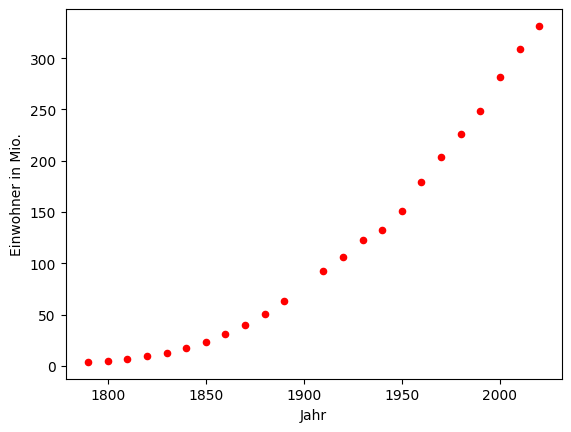

In [169]:
import matplotlib.pyplot as plt
import numpy as np
x = dat['Jahr']
y = dat['Einwohner']

dat.plot(kind='scatter', x='Jahr', y='Einwohner', color='red')
plt.xlabel('Jahr')
plt.ylabel('Einwohner in Mio.')
plt.show()

## c) Regressionskurven bestimmen
Untersuchen Sie je nach Matrikelnummer Ihre 5 Funktionen um eine Regressionskurve durch die Punkte zu legen:<br>

| Gerade Matrikelnummer-Endung: | Ungerade Matrikelnummer-Endung: |
| :- | :- |
| Lineare Funktion: $\;\;$ $y = ax+b$ | Lineare Funktion: $\;\;$ $y = ax+b$ |
| Polynom 2. Grades: $y = ax^2+bx+c$ | Polynom 2. Grades: $y = ax^2+bx+c$ |
| Polynom 4. Grades: $y=ax^4+bx^3+cx^2+dx+e$ | Polynom 3. Grades: $y=ax^3+bx^2+cx+d$ |
| Polynom 6. Grades: $y=ax^6+bx^5+cx^4+dx^3+gx^2+ux+v$ | Polynom 6. Grades: $y=ax^6+bx^5+cx^4+dx^3+gx^2+ux+v$ |
| Exponentialfunktion: $y=a \cdot{\rm e}^{bx}$ | Logarithmusfunktion: $y=a \cdot\ln{(x)}-b$ |

Stellen Sie **in einer Tabelle den Regressionstyp** (z.B. lineare Funktion, Polynom 2. Grades, …), die **geschätzten Koeffizienten mit Achsenabschnitt und das Bestimmtheitsmaß** dar.

***Tipp:***<br>
Verwenden Sie für die Schätzung der Regressionskurve und des Bestimmtheitsmaßes standardisierte Eingangswerte (Jahreszahlen)

In [170]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

x = dat['Jahr'].values.reshape(-1, 1)  # Reshape to a column vector
y = dat['Einwohner']

# Initialize Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(x, y)
y_pred = linear_reg.predict(x)
r_squared = r2_score(y, y_pred)

# Fit polynomial regression 2nd degree
poly_features_2 = PolynomialFeatures(degree=2)
x_poly_2 = poly_features_2.fit_transform(x)

# Fit polynomial regression 3rd degree
poly_features_3 = PolynomialFeatures(degree=3)
x_poly_3 = poly_features_3.fit_transform(x)

# Fit polynomial regression 6th degree
poly_features_6 = PolynomialFeatures(degree=6)
x_poly_6 = poly_features_6.fit_transform(x)

# Initialize Linear Regression models
poly_reg_2 = LinearRegression()
poly_reg_3 = LinearRegression()
poly_reg_6 = LinearRegression()

# Fit the models
poly_reg_2.fit(x_poly_2, y)
poly_reg_3.fit(x_poly_3, y)
poly_reg_6.fit(x_poly_6, y)

# predictions
y_pred_poly_2 = poly_reg_2.predict(x_poly_2)
y_pred_poly_3 = poly_reg_3.predict(x_poly_3)
y_pred_poly_6 = poly_reg_6.predict(x_poly_6)

# Calculate R^2 (Bestimmtheitsmaß)
r_squared_poly_2 = r2_score(y, y_pred_poly_2)
r_squared_poly_3 = r2_score(y, y_pred_poly_3)
r_squared_poly_6 = r2_score(y, y_pred_poly_6)

# Define log function
def log_function(x, a0, a1):
    return a0 * np.log(x) + a1

# Fit the log function
log_params, arg = curve_fit(log_function, x.flatten(), y)

# Predict using the log function
y_pred_log = log_function(x.flatten(), *log_params)

# Calculate R^2 for the log function
r_squared_log = r2_score(y, y_pred_log)

# new DataFrame
results = pd.DataFrame(columns=['Regressions Typ', 'Achsenabschnitt', 'Koeffizenten', 'Bestimmtheitsmaß'])

# Linear Regression
linear_result = pd.DataFrame({'Regressions Typ': ['Linear'],
                              'Achsenabschnitt': [linear_reg.intercept_],
                              'Koeffizenten': [linear_reg.coef_],
                              'Bestimmtheitsmaß': [r_squared]})
results = pd.concat([results, linear_result], ignore_index=True)

# Polynomial Regression 2nd Degree
poly_2_result = pd.DataFrame({'Regressions Typ': ['Polynom 2. Grades'],
                              'Achsenabschnitt': [poly_reg_2.intercept_],
                              'Koeffizenten': [poly_reg_2.coef_],
                              'Bestimmtheitsmaß': [r_squared_poly_2]})
results = pd.concat([results, poly_2_result], ignore_index=True)

# Polynomial Regression 3rd Degree
poly_3_result = pd.DataFrame({'Regressions Typ': ['Polynom 3. Grades'],
                              'Achsenabschnitt': [poly_reg_3.intercept_],
                              'Koeffizenten': [poly_reg_3.coef_],
                              'Bestimmtheitsmaß': [r_squared_poly_3]})
results = pd.concat([results, poly_3_result], ignore_index=True)

# Polynomial Regression 6th Degree
poly_6_result = pd.DataFrame({'Regressions Typ': ['Polynom 6. Grades'],
                              'Achsenabschnitt': [poly_reg_6.intercept_.round(3)],
                              'Koeffizenten': [poly_reg_6.coef_],
                              'Bestimmtheitsmaß': [r_squared_poly_6]})
results = pd.concat([results, poly_6_result], ignore_index=True)

# Log Function
log_result = pd.DataFrame({'Regressions Typ': ['Logarithmisch'],
                           'Achsenabschnitt': [log_params[1]],
                           'Koeffizenten': [log_params[0]],
                           'Bestimmtheitsmaß': [r_squared_log]})
results = pd.concat([results, log_result], ignore_index=True)

# show results
results



,Regressions Typ,Achsenabschnitt,Koeffizenten,Bestimmtheitsmaß
0,Linear,-2595.797365,[1.4228996271706251],0.924853
1,Polynom 2. Grades,21751.022943,"[0.0, -24.174782576049353, 0.006718933215179135]",0.999255
2,Polynom 3. Grades,-808.442775,"[0.0, 11.405044135848792, -0.01197123327557568...",0.999323
3,Polynom 6. Grades,-9624.104000,"[0.0, 1.2858282779897519e-06, 4.93819828683798...",0.999328
4,Logarithmisch,-20240.693558,2695.543011,0.916372


## d) Beste Kurve wählen
Wählen Sie aus den von Ihnen untersuchten Möglichkeiten die am besten geeignete Kurve. **Erläutern** Sie Ihre Wahl.

## Erläuterung
Das Polynom 6. Grades ist hier am besten geeignet, da es das Wachstum am genauesten modelliert. (Auch zu sehen am Bestimtheitsmaß, Höchter Wert im Vergleich zu den Anderen.)

## e) Streudiagramm mit Regressionskurve
Zeichnen Sie in das Streudiagramm die optimale Regressionskurve aus 4) ein. Dabei sollen auf der x-Achse die Jahreszahlen und auf der y-Achse die Bevölkerungszahl angegeben sein.

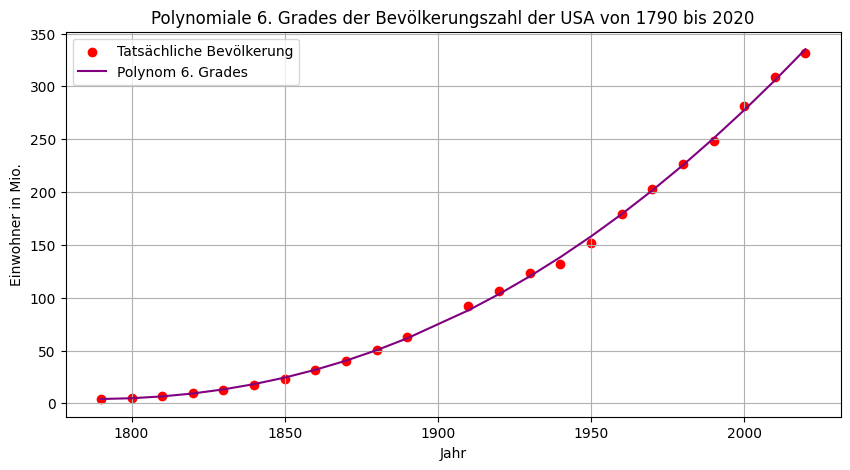

In [171]:
# Sort values 
sort_axis = np.argsort(x.flatten())
x_sort = x[sort_axis]
y_pred_poly_2_sort = y_pred_poly_2[sort_axis]
y_pred_poly_3_sort = y_pred_poly_3[sort_axis]
y_pred_poly_6_sort = y_pred_poly_6[sort_axis]


# Plot
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='red', label='Tatsächliche Bevölkerung')
plt.plot(x_sort, y_pred_poly_6_sort, color='purple', label='Polynom 6. Grades')
plt.xlabel('Jahr')
plt.ylabel('Einwohner in Mio.')
plt.title('Polynomiale 6. Grades der Bevölkerungszahl der USA von 1790 bis 2020')
plt.legend()
plt.grid(True)
plt.show()


## f) Prognose für das Jahr 2030
Berechnen Sie aus den Ihnen vorgelegten Daten eine Prognose über die Bevölkerungszahl der USA im Jahr 2030. **Erläutern** Sie Ihr Vorgehen.

***Tipp:***<br>
Beim Wert für die Prognose sollten Sie überlegen, ob Ihr Wert stimmen kann oder ob er nicht vielleicht völlig unrealistisch ist. <br>
Der Grund für unrealistische Werte ist dabei evtl. gar nicht in der Wahl der Regressionsvariante zu suchen, sondern evtl. darin, dass numerische Probleme vorliegen und die geschätzten Koeffizienten mit zu wenigen Nachkommastellen verwendet werden!

In [172]:
# Define the year for the prediction
year_2030 = np.array([[2030]])

# Predict population for 2030 using polynomial regression 6th degree
sixth_prediction = poly_reg_6.predict(poly_features_6.transform(year_2030))

log_prediction = log_function(2030, *log_params)

# Print predictions
print("Prognose der Bevölkerungszahl für das Jahr 2030:")
print("Polynom 6. Grades:", sixth_prediction[0].round(3))
print("Logarithmisch:", log_prediction.round(3))

Prognose der Bevölkerungszahl für das Jahr 2030:
Polynom 6. Grades: 366.017
Logarithmisch: 287.999


## Erläuterung zum Vorgehen
Das Polynom 6. Grades spiegelt die Bevölkerungsentwicklung aufgrund seiner Flexibiliät am genauesten wider. Somit ist es auch am besten für eine Prognose geeignet. Wenn man die Koeffizenten nimmt und bis ins Jahr 2030 weiterberchnen lässt, dann ergibt sich hier eine ungefähre Vorhersage. 